In [15]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [16]:
#Creamos el dataframe a partir del set de datos y les asigno un tipo acorde a las descripciones
df = pd.read_csv('data/train.csv',index_col= 'id', dtype={'titulo':'object','descripcion':'object',\
                                           'tipodepropiedad':'category', 'direccion':'object',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float', 'lat':'float', 'lng':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool',\
                                           'precio':'float'}, parse_dates=['fecha'])
df.dtypes

titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                              category
provincia                           category
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                                bool
usosmultiples                           bool
piscina                                 bool
escuelascercanas                        bool
centroscomercialescercanos              bool
precio                               float64
dtype: obj

Primer analisis: vemos cuales son las provincias mas pobladas, en terminos de cantidad de propiedades en venta

In [31]:
df.head(100)

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23,False,False,False,False,False,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,19.31,-99.23,2013-06-28,False,False,False,True,True,3600000.00
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,144.00,166.00,48551.00,nan,nan,2015-10-17,False,False,False,False,False,1200000.00
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,63.00,67.00,53666.00,19.30,-99.69,2012-03-09,False,False,False,True,True,650000.00
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,nan,nan,2016-06-07,False,False,False,False,False,1150000.00
126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,1.00,75.00,90.00,23650.00,19.30,-99.15,2014-03-18,False,False,False,False,True,1100000.00
139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,nan,3.00,1.00,2.00,140.00,160.00,73510.00,17.14,-96.80,2016-02-23,False,False,False,False,False,1150000.00
5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.00,4.00,2.00,3.00,293.00,293.00,130510.00,20.67,-87.04,2016-10-20,False,False,False,False,False,4200000.00
44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.00,2.00,1.00,1.00,58.00,nan,9010.00,nan,nan,2014-01-06,False,False,False,True,True,310000.00


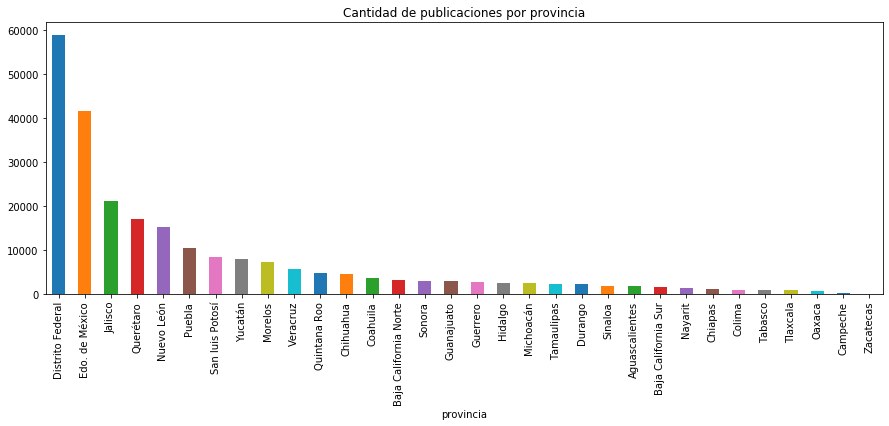

In [87]:
cantidad_de_publicaciones_por_provincia = df.groupby('provincia').count()
cantidad_de_publicaciones_por_provincia = cantidad_de_publicaciones_por_provincia['precio'].sort_values(ascending = False)
cantidad_de_publicaciones_por_provincia.plot(kind='bar',figsize=(15,5),color=sns.color_palette(),title = 'Cantidad de publicaciones por provincia')
plt.savefig('Cantidad_publicaciones_por_provincia.png',bbox_inches='tight')

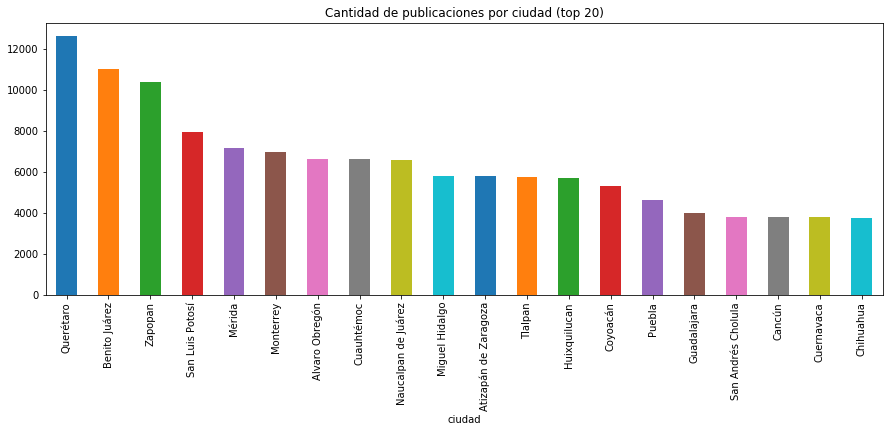

In [88]:
cantidad_de_publicaciones_por_ciudad = df.groupby('ciudad').count()
cantidad_de_publicaciones_por_ciudad = cantidad_de_publicaciones_por_ciudad['precio'].sort_values(ascending = False).head(20)
cantidad_de_publicaciones_por_ciudad.plot(kind='bar',figsize=(15,5),color=sns.color_palette(),title = 'Cantidad de publicaciones por ciudad (top 20)')
plt.savefig('Cantidad_publicaciones_por_ciudad.png',bbox_inches='tight')

Se puede ver que Distrito Federal, Edo. de Mexico, Jalisco. Querétaro y Nuevo León son las provincias con mas publicaciones

In [105]:
df['precio_m2'] = df['precio']/df['metroscubiertos']
lista_top20_ciudades = cantidad_de_publicaciones_por_ciudad.index.to_list()
print(lista_top20_ciudades)
df_filtrado_por_top_ciudades = df[df['ciudad'].isin(lista_top20_ciudades)]
df_filtrado_por_top_ciudades['ciudad'].value_counts()

['Querétaro', 'Benito Juárez', 'Zapopan', 'San Luis Potosí', 'Mérida', 'Monterrey', 'Alvaro Obregón', 'Cuauhtémoc', 'Naucalpan de Juárez', 'Miguel Hidalgo', 'Atizapán de Zaragoza', 'Tlalpan', 'Huixquilucan', 'Coyoacán', 'Puebla', 'Guadalajara', 'San Andrés Cholula', 'Cancún', 'Cuernavaca', 'Chihuahua']


Querétaro                     12646
Benito Juárez                 11014
Zapopan                       10360
San Luis Potosí                7925
Mérida                         7162
Monterrey                      6946
Alvaro Obregón                 6633
Cuauhtémoc                     6614
Naucalpan de Juárez            6554
Miguel Hidalgo                 5795
Atizapán de Zaragoza           5783
Tlalpan                        5721
Huixquilucan                   5718
Coyoacán                       5293
Puebla                         4636
Guadalajara                    4006
San Andrés Cholula             3805
Cancún                         3779
Cuernavaca                     3775
Chihuahua                      3757
Rafael Lara Grajales              0
San Antonio la Isla               0
San Andrés Tuxtla                 0
San Andrés Huayápam               0
San Agustín de las Juntas         0
Rincón de Romos                   0
San Agustín Tlaxiaca              0
San Agustín Etla            

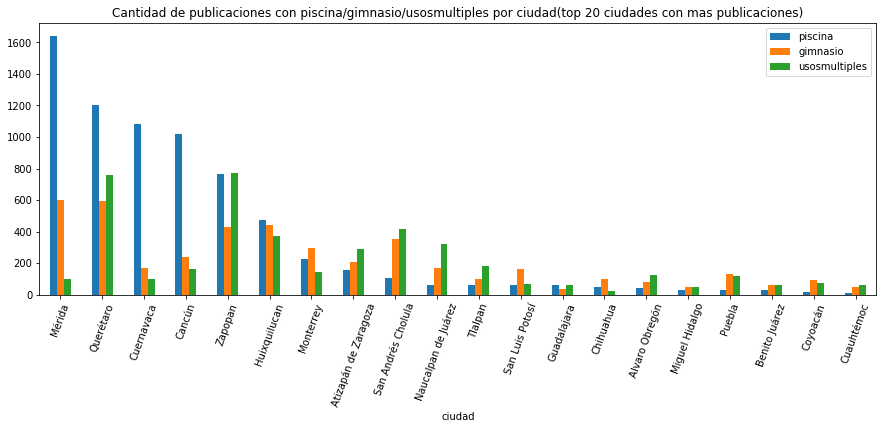

In [125]:
df_filtrado_por_top_ciudades.groupby('ciudad').agg({'piscina': 'sum','gimnasio' : 'sum', 'usosmultiples' : 'sum'})\
    .sort_values('piscina',ascending=False).head(20)\
    .plot(kind='bar',color=sns.color_palette(),figsize=(15,5),rot=70,title= 'Cantidad de publicaciones con piscina/gimnasio/usosmultiples por ciudad(top 20 ciudades con mas publicaciones)')

Me parece una buena idea analizar el precio por m2 cubierto para casas y departamentos, dividido por cada ciudad

In [116]:
df_filtrado_por_m2 = df.loc[df['precio_m2'] < 20000]
df_filtrado_por_top_ciudades = df_filtrado_por_top_ciudades.loc[df_filtrado_por_top_ciudades['precio_m2']<30000]

Agregamos la columna 'precio_m2' que calcula el precio por metro cubierto cuadrado, lo hicimos directamente sobre metro cubierto ya que metros totales tiene muchos datos invalidos (NaN), luego filtramos aquellas publicaciones que no respetan el percentil 80 sobre el precio por metro cuadrado cubierto (dado que generaba muchas irregularidades).

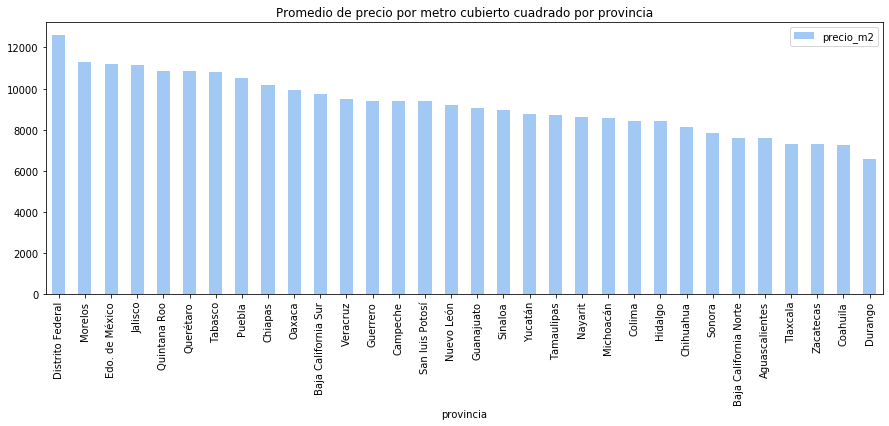

In [126]:
casas = df_filtrado_por_m2.loc[df['tipodepropiedad'] == 'Casa']
casas.groupby('provincia').agg({'precio_m2' : 'mean'})\
    .sort_values('precio_m2',ascending=False)\
    .plot(kind='bar',color=sns.color_palette('pastel'),figsize=(15,5),title= 'Promedio de precio por metro cubierto cuadrado por provincia')
plt.savefig('PrecioMetroCuadradoPromedioCasasPorProvincia',bbox_inches='tight')

In [93]:
casas_teapa = casas.loc[casas['ciudad'] == 'Teapa']
casas_teapa.head(200)

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_m2
id,,,,,,,,,,,,,,,,,,,,,,,
167594,casa en venta en teapa,-- cv- --,Casa,Carretera Villahermosa - Teapa Km. 15.5 0,Teapa,Tabasco,0.00,3.00,nan,3.00,181.00,nan,nan,nan,nan,2016-04-08,False,False,False,False,False,3500000.00,19337.02
193166,"casa en venta en teapa centro, teapa, tabasco",0,Casa,Carretera Villahermosa - Teapa Km. 15.5,Teapa,Tabasco,0.00,3.00,0.00,3.00,181.00,nan,101230.00,nan,nan,2013-09-04,False,False,False,False,False,3500000.00,19337.02


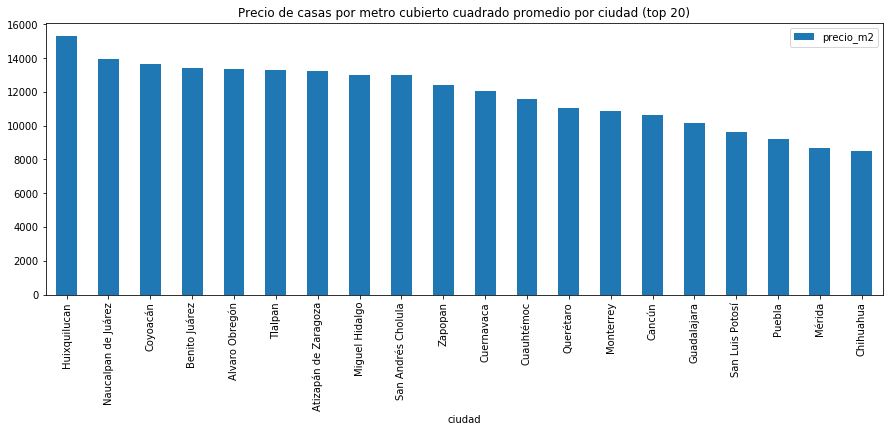

In [120]:
casas= df_filtrado_por_top_ciudades.loc[df_filtrado_por_top_ciudades['tipodepropiedad'] == 'Casa']
casas.groupby('ciudad').agg({'precio_m2' : 'mean'})\
    .sort_values('precio_m2',ascending=False).head(20)\
    .plot(kind='bar',figsize=(15,5),title= 'Precio de casas por metro cubierto cuadrado promedio por ciudad (top 20)')
plt.savefig('PrecioPromedioMetroCubiertoCasaPorCiudad',bbox_inches='tight')

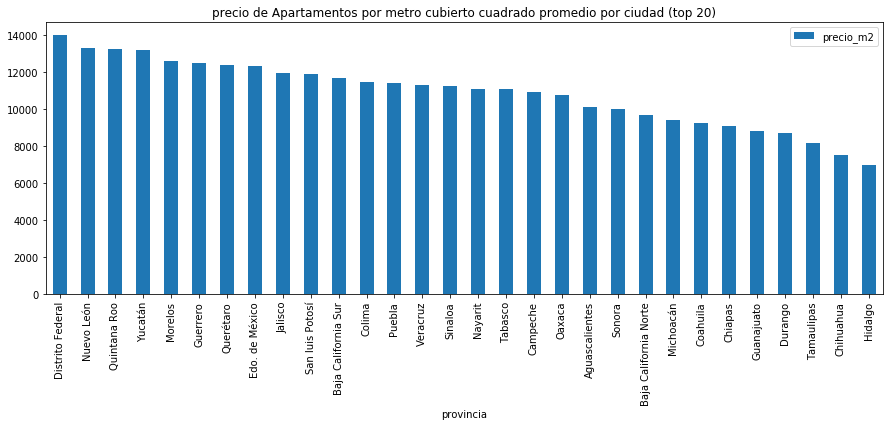

In [75]:
deptos = df_filtrado_por_m2.loc[df['tipodepropiedad'] == 'Apartamento']
deptos.groupby('provincia').agg({'precio_m2' : 'mean'})\
    .sort_values('precio_m2',ascending=False).head(30)\
    .plot(kind='bar',figsize=(15,5),title= 'precio de Apartamentos por metro cubierto cuadrado promedio por ciudad (top 20)')

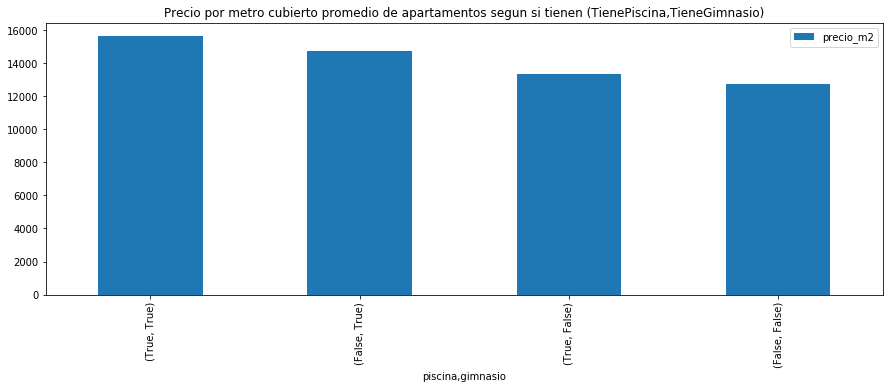

In [77]:
deptos.groupby(['piscina','gimnasio']).agg({'precio_m2':'mean'})\
    .sort_values('precio_m2',ascending= False)\
        .plot(kind='bar',figsize=(15,5),color=sns.color_palette(),title= 'Precio por metro cubierto promedio de apartamentos segun si tienen (TienePiscina,TieneGimnasio)');

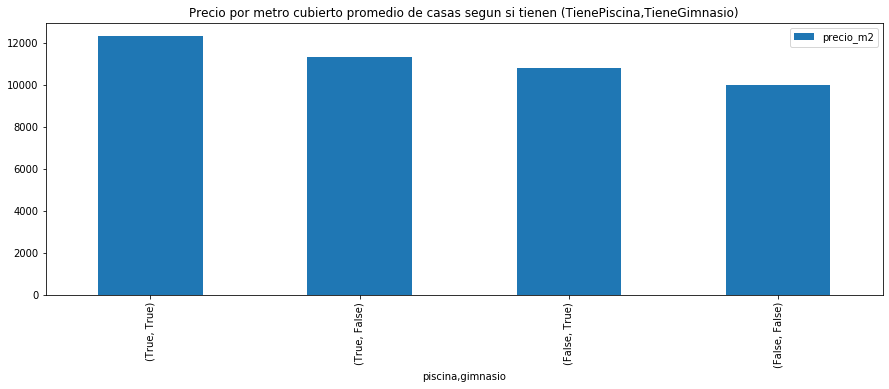

In [124]:
casas.groupby(['piscina','gimnasio']).agg({'precio_m2':'mean'})\
    .sort_values('precio_m2',ascending= False)\
        .plot(kind='bar',figsize=(15,5),color=sns.color_palette(),title= 'Precio por metro cubierto promedio de casas segun si tienen (TienePiscina,TieneGimnasio)');

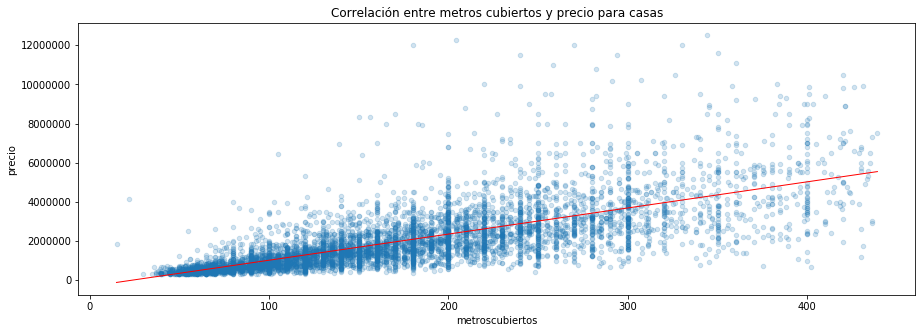

In [130]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
df1 = df.loc[df['tipodepropiedad'] == 'Casa']
df1_sample = df1.sample(frac=0.2).copy().dropna().sort_values(column)
df1_sample.sort_values(column).plot.scatter(x=column, y='precio',alpha=.2,figsize=(15, 5), title="Correlación entre metros cubiertos y precio para casas")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df1_sample[column]
y = df1_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=1);


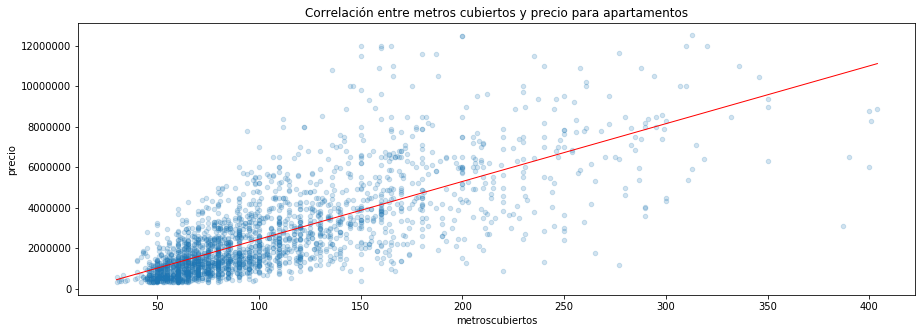

In [132]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
df2 = df.loc[df['tipodepropiedad'] == 'Apartamento']
df2_sample = df2.sample(frac=0.2).copy().dropna().sort_values(column)
df2_sample.sort_values(column).plot.scatter(x=column, y='precio',alpha=.2,figsize=(15, 5), title="Correlación entre metros cubiertos y precio para apartamentos")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df2_sample[column]
y = df2_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=1);

De estos ultimos 2 graficos pareciera verse que si bien hay una tendencia a aumentar el precio por metro cuadrado segun los features que tiene la casa/apartamento, en las casas influye mas si tiene pileta, y en los apartamentos influye mas si tiene gimnasio